# 区間演算

区間の表現，区間演算について述べる．精度保証付き数値計算の基本的な原理は，実数値で与えられる真の値の上限と下限を浮動小数点数により浮動小数点演算を用いて包み込むことである．

$\mathbb{R}$上の区間を
$$
	\boldsymbol{a}:=\{x\in\mathbb{R}:\underline{a}\le x\le\overline{a},~\underline{a}, \overline{a}\in\mathbb{R}\}=[\underline{a}, \overline{a}]
$$

と表し，区間の全体を$\mathbb{IR}$とする．
この時 $\underline{a}$ を区間の下端，$\overline{a}$ を区間の上端という．
さらに区間の

$$
\begin{array}{ll}
\mbox{直径（diameter）:}&\mathrm{d}(\boldsymbol{a})=\overline{a}-\underline{a}\in\mathbb{R}\\
\mbox{半径（radious）:}&\mathrm{rad}(\boldsymbol{a})=\frac{\overline{a}-\underline{a}}{2}\in\mathbb{R}\\
\mbox{中点（center）:}&\mathrm{mid}(\boldsymbol{a})=\frac{\overline{a}+\underline{a}}{2}\in\mathbb{R}\\
\mbox{最小絶対値:}&\mathrm{mig}(\boldsymbol{a})=\min\{|a|:a\in\boldsymbol{a}\}\in\mathbb{R}\\
\mbox{最大絶対値:}&\mathrm{mag}(\boldsymbol{a})=\max\{|a|:a\in\boldsymbol{a}\}\in\mathbb{R}\\
\end{array}
$$

をそれぞれ表すとする．

Juliaで区間を扱うために[IntervalArithmetic.jl](https://github.com/JuliaIntervals/IntervalArithmetic.jl)パッケージを使う.
IntervalArithmetic.jlパッケージを使うには``julia>``状態で`]`を入力すると, パッケージモードになる. そこで

```julia:
(v1.3) pkg> add IntervalArithmetic
```

と入力して, インストールする.
あるいはREPLで

```julia:
using Pkg
Pkg.add("IntervalArithmetic")
```

としてもインストールされる.
インストールが完了したら, 

```julia:
using IntervalArithmetic
```

としてパッケージを呼び出す.

In [1]:
using IntervalArithmetic

a = interval(-2, 1);
# a = -2. .. 1.    # .. operator
println(a)

print("d(a) = ")
println(diam(a))

print("rad(a) = ")
println(radius(a))

print("mid(a) = ")
println(mid(a))

print("mig(a) = ")
println(mig(a))

print("mag(a) = ")
println(mag(a))

# @format midpoint 3
# @format full
# @format standard 10

[-2, 1]
d(a) = 3.0
rad(a) = 1.5
mid(a) = -0.5
mig(a) = 0.0
mag(a) = 2.0


## 区間演算（上端下端型）

区間$\boldsymbol{X}=[a,b]$, $\boldsymbol{Y}=[c,d]$に対して，四則演算を定義する：

\begin{align*}
	\boldsymbol{X}+\boldsymbol{Y}&=[a+c,b+d]\\
	\boldsymbol{X}-\boldsymbol{Y}&=[a-d,b-c]\\
	\boldsymbol{X}\times\boldsymbol{Y}&=[\min\{ac,ad,bc,bd\},\max\{ac,ad,bc,bd\}]\\
	\boldsymbol{X}\div\boldsymbol{Y}&=[\min\{a/c,a/d,b/c,b/d\},\max\{a/c,a/d,b/c,b/d\}]
\end{align*}

$\times,~\div$は場合分けをする．

||$c>0$|$0\in\boldsymbol{Y}$|$d<0$|
|:-------------:|:-------------:|:-------------:|:-------------:|
|$a>0$|$[ac,bd]$|$[bc,bd]$|$[bc,ad]$|
|$0\in\boldsymbol{X}$|$[ad,bd]$|A|$[bc,ac]$|
|$b<0$|$[ad,bc]$|$[ad,ad]$|$[bd,ac]$|

ただし A$=[\min\{ad,bc\},\max\{ad,bc\}].$

注：区間内全ての要素について演算を行うため無限回の計算が必要のように思えるが，これをまとめて実現するのが区間演算．さらに除算で割る区間$\boldsymbol{Y}$に0が含まれる（$0\in\boldsymbol{Y}$）と演算結果は無限大を含むことになる．


In [2]:
X = interval(-2, 1)
Y = interval(1, 3)

println(X + Y)
println(X - Y)
println(X * Y)
println(X / Y)
println(Y / X)

[-1, 4]
[-5, 0]
[-6, 3]
[-2, 1]
[-∞, ∞]


包含関係の単調性が成立する．すなわち $\boldsymbol{X}_1\subseteq \boldsymbol{X}_2$ かつ $\boldsymbol{Y}_1\subseteq \boldsymbol{Y}_2$ ならば $\boldsymbol{X}_1\circ\boldsymbol{Y}_1\subseteq \boldsymbol{X}_2\circ\boldsymbol{Y}_2$ が成立する．ここで，$\circ\in\{+,-,\times,\div\}$とする．

さらに $+$, $\times$ に関しては，交換則と結合則が成立する．

$$
    \boldsymbol{X}\circ\boldsymbol{Y}=\boldsymbol{Y}\circ\boldsymbol{X},~\boldsymbol{X}\circ(\boldsymbol{Y}\circ\boldsymbol{Z})=(\boldsymbol{X}\circ\boldsymbol{Y})\circ\boldsymbol{Z},\quad\circ\in\{+,\times\}.
$$

しかし，加法と乗法の逆元は存在しない．すなわち分配則が成立しない．劣分配則のみ成立する．

$$
    \boldsymbol{X}(\boldsymbol{Y}+\boldsymbol{Z})\subseteq\boldsymbol{X}\boldsymbol{Y}+\boldsymbol{X}\boldsymbol{Z}.
$$

In [3]:
X = interval(-1, 1)
Y = interval(1, 2)
Z = interval(-2, 1)

println(X * (Y + Z))
println(X * Y + X * Z)
println((X * (Y + Z) ⊂ X * Y + X * Z))

[-3, 3]
[-4, 4]
true


## 中心半径型区間演算

上端下端型区間の他に区間を中心と半径で表す型もある．それを**中心半径型区間**という．中心半径型（mid-rad 型）区間は実数 $x\in\mathbb{R}$ に対して，区間の中心を $x_c$，半径を $x_r$ としたとき

$$
    \boldsymbol{x}=\langle x_c,x_r\rangle=\left\{x:x_c-x_r\le x\le x_c+x_r\right\}
$$

と表される．中心半径型区間と上端下端型区間の間には次のような関係が成り立つ：

$$
    \boldsymbol{x}=[\underline{x},\overline{x}]=[x_c-x_r,x_c+x_r]=\left\langle\frac{\underline{x}+\overline{x}}{2},\frac{\underline{x}-\overline{x}}{2}\right\rangle=\langle x_c,x_r\rangle=\boldsymbol{x}
$$

中心半径型区間 $\boldsymbol{x}=\langle x_c,x_r\rangle$, $\boldsymbol{y}=\langle y_c,y_r\rangle$ に対して，四則演算を定義する．

\begin{align*}
    \boldsymbol{x}+\boldsymbol{y}&=\langle x_c+y_c,x_r+y_r\rangle\\
    \boldsymbol{x}-\boldsymbol{y}&=\langle x_c-y_c,x_r+y_r\rangle\\
    \boldsymbol{x}\times\boldsymbol{y}&\subseteq\langle x_cy_c,|x_c|y_r+|y_c|x_r+x_ry_r\rangle\\
    \boldsymbol{x}\div\boldsymbol{y}&=\frac{\boldsymbol{x}\times\boldsymbol{y}}{\underline{y}\overline{y}}=\frac{\boldsymbol{x}\times\boldsymbol{y}}{y_c^2-y_r^2}
\end{align*}

ちなみに乗算は$\mathop{sgn}(\cdot)$を括弧内の符号を返す関数とすると

$$
    \boldsymbol{x}\times\boldsymbol{y}=\langle x_cy_c+\delta_1,\delta_2\rangle
$$

と書ける．ここで

$$
    \delta_1=\mathop{sgn}(x_cy_c)\min\left\{x_r|y_c|,|x_c|y_r,x_ry_r\right\}
$$
$$
\delta_2=\max\left\{x_r(|y_c|+y_r),(|x_c|+x_r)y_r,x_r|y_c|+|x_c|y_r\right\}
$$

である．

In [4]:
X = 0 ± 1;
Y = 1.5 ± 0.5;
Z = -0.5 ± 1.5;

@format midpoint 3
println(X + Y)
println(X - Y)
println(X * Y)
println(X / Y)

1.5 ± 1.5
-1.5 ± 1.5
0 ± 2
0 ± 1


## 関数の値域評価

$ \boldsymbol{I}\in\mathbb{IR}$をある区間とし，$f:D\subset\mathbb{R}\to\mathbb{R}$を領域 $D$ で連続な関数とする．
このとき関数 $f$ は $\mathbb{IR}$ 上の関数として拡張できる．

$$
	f(\boldsymbol{I})=\{f(x):x\in\boldsymbol{I}\}
$$

この $f(\boldsymbol{I})$ は関数の値域で，これを厳密に計算することは非線形関数の場合不可能である．よって

$$
	f(\boldsymbol{I})\subseteq [a,b]
$$

となる区間 $[a,b]$ で関数の値域を包含する．これを $f$ の区間 $\boldsymbol{I}$ における**区間拡張**（区間拡張は一意的でないことに注意！）といい，$f_{[\,]}(\boldsymbol{I})=[a,b]$ と表す．

#### 注意
IEEE 754 標準規格における丸めに従っているのは「**四則演算・平方根**」だけ．それ以外の関数（例えば，$\sin$，$\cos$ などは）丸めの向きの
変更が不可能（**自作するか，丸めに対応し作成されたものを使う**こと）．ただし，デフォルトの関数も精度が十分に高く作られているため，精度保証などを考えない場合はそれで十分．

### 例

例えば，関数 $f(x)=x^2+2x$ を考える．関数に区間を単純に代入すると
\begin{align*}
	x&\in[0.9,1.1]\\
	x^2&\in[0.81,1.21]\\
	2x&\in[1.8,2.2]\\
	x^2+2x&\in[2.61,3.41]\\
\end{align*}

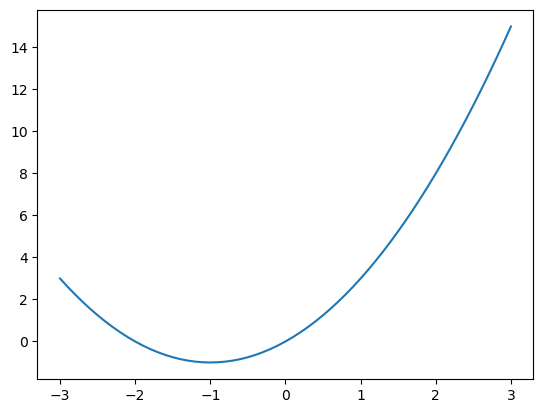

[2.609999999, 3.410000001]


In [5]:
@format standard 10
using PyPlot

function f(x)
    return x.^2+2x
end

x = range(-3, 3, step = 0.1);
y = f(x);

plot(x, y)
println(f(0.9 .. 1.1))

In [6]:
println(f(0.9))
println(f(1.1))

2.6100000000000003
3.41


$f(x)=x^2+2x$ のときは値域評価が区間拡張を利用しても精度が良い．一方で

$f(x)=x^2-2x$;

\begin{align*}
	x&\in[0.9,1.1]\\
	x^2&\in[0.81,1.21]\\
	2x&\in[1.8,2.2]\\
	x^2-2x&\in[-1.39,-0.59]\mbox{（幅0.8!）}\\
\end{align*}


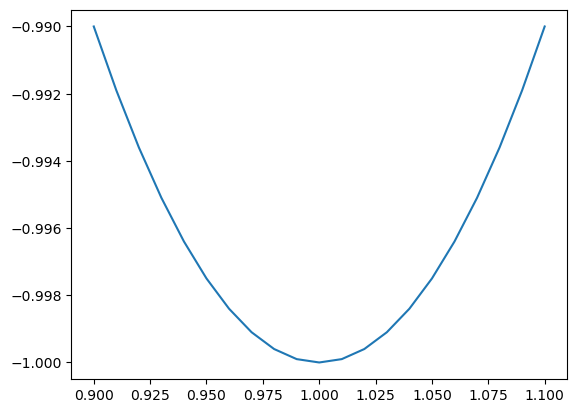

[-1.390000001, -0.5899999999]
-1
-0.99


In [7]:
function f(x)
    return x.^2 - 2x
end

x = range(0.9, 1.1, step=0.01);
y = f(x);

plot(x, y)

println(f(0.9 .. 1.1))
println(f(1))
println(f(1.1))

これから値域は $[-1,-0.99]$，一方で区間演算による区間拡張は $[-1.39,-0.59]$．だいぶ過大評価になってしまう．そこで区間幅を改良したい

**アイディア1.** $f(x)=x(x-2)$;

\begin{align*}
	&x\in[0.9,1.1]\\
	&x(x-2)=[0.9,1.1]\times[-1.1,-0.9]=[-1.21,-0.81]\mbox{（幅0.4）}
\end{align*}

大分改善された．もう一声！

**アイディア2.** $f(x)=(x-1)^2-1$;

\begin{align*}
	x\in[0.9,1.1]&\\
	(x-1)^2-1=&[-0.1,0.1]^2-1\\
	=&[{\color{red}{0}},0.01]-1\\
	=&[-1,-0.99]\mbox{（幅0.01）}
\end{align*}

In [9]:
x = @interval(0.9, 1.1)

println(x^2 - 2x)
println(x * (x-2))
println((x-1)^2 - 1)
# println(bitstring(0.9))
# println(bitstring(x.lo))

[-1.390000001, -0.5899999999]
[-1.210000001, -0.8099999999]
[-1, -0.9899999999]


区間の定義で、実数を端点にする時は`@interval`を使う。端点が浮動小数点で良い場合は`interval`でOK. `interval`の方が呼び出しは早い。例えば、0.1を含む区間は`interval`での定義では0.1に一番近い浮動小数点数を端点にもつ点区間が返されて、厳密な包含にならない。

In [24]:
x = interval(0.1)
println(bitstring(0.1))
println(bitstring(x.lo))
println(bitstring(x.hi))

x = @interval(0.1)
println(bitstring(0.1))
println(bitstring(x.lo))
println(bitstring(x.hi))

0011111110111001100110011001100110011001100110011001100110011010
0011111110111001100110011001100110011001100110011001100110011010
0011111110111001100110011001100110011001100110011001100110011010
0011111110111001100110011001100110011001100110011001100110011010
0011111110111001100110011001100110011001100110011001100110011001
0011111110111001100110011001100110011001100110011001100110011010


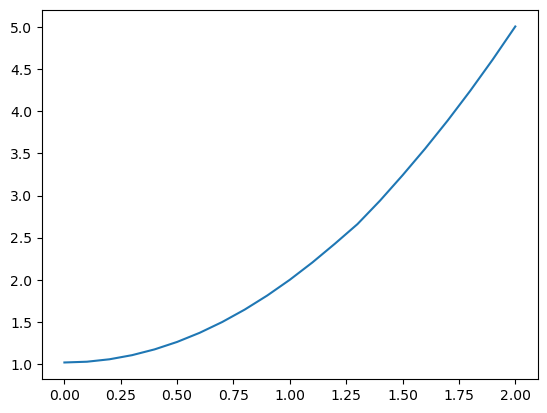

[1.988546365, 2.440000001]
[-∞, 2.939882027]


In [9]:
# Kahan's example
f(x) = (1/80) * log(abs(3*(1 - x) + 1)) + x.^2 + 1;
x = range(0, 2, step = 0.1);
y = f.(x);
plot(x, y)
println(f(1.0..1.2))
println(f(1.3..1.4))

### 区間幅の抑制のための工夫

1. **区間分割**
$$
	\boldsymbol{I}=\boldsymbol{I}_1\cup\boldsymbol{I}_2
$$
と考えて，$f_{[\,]}(\boldsymbol{I}_1)\cup f_{[\,]}(\boldsymbol{I}_2)$を計算する．

1. **平均値形式**  
区間拡張$f_{[\,]}(\boldsymbol{I})$を
$$
	f_{[\,]}(\boldsymbol{I})=f(c)+f'_{[\,]}(\boldsymbol{I})(\boldsymbol{I}-c),~c=\mathrm{mid}(\boldsymbol{I})
$$
によって得る．ただし$f'_{[\,]}(\boldsymbol{I})$は区間$\boldsymbol{I}$における$f$の1階微分の区間拡張．



## 機械区間演算

区間演算をコンピュータで実現するには$\mathbb{R}$の代わりに$\mathbb{F}$を使った区間が必要．そのような区間全体を

$$
	\mathbb{IF}:=\{\boldsymbol{x}\in\mathbb{IR}: \underline{x},~\overline{x}\in\mathbb{F}\}
$$

と定義する．IEEE754規格に準拠したシステム上では演算後の丸めの向きを制御することができる．
演算結果が浮動小数点数でない場合，丸めの向きを制御して計算する．
いま$a,b\in\mathbb{F}$に対して，$\circ\in\{+,-,\times,\div\}$として

\begin{align*}
	\mathtt{fl}_{\bigtriangledown}\!\left(a\circ b\right)&:=\max\{x\in\mathbb{F}:x\le a\circ b\}\mbox{（下向き丸め）}\\
	\mathtt{fl}_{\bigtriangleup}\!\left(a\circ b\right)&:=\min\{x\in\mathbb{F}:x\ge a\circ b\}\mbox{（上向き丸め）}
\end{align*}

とすると

$$
	\mathtt{fl}_{\bigtriangledown}\!\left(a\circ b\right)\le a\circ b\le\mathtt{fl}_{\bigtriangleup}\!\left(a\circ b\right)
$$

が成立する．

$\boldsymbol{X}=[a,b]$, $\boldsymbol{Y}=[c,d]$ ($a,b,c,d\in\mathbb{F}$)に対して，機械区間演算は次のように実現できる．

\begin{align*}
	\boldsymbol{X}+\boldsymbol{Y}&=[\mathtt{fl}_{\bigtriangledown}\!\left(a+c\right),\mathtt{fl}_{\bigtriangleup}\!\left(b+d\right)]\\
	\boldsymbol{X}-\boldsymbol{Y}&=[\mathtt{fl}_{\bigtriangledown}\!\left(a-d\right),\mathtt{fl}_{\bigtriangleup}\!\left(b-c\right)]\\
	\boldsymbol{X}\times\boldsymbol{Y}&=[\mathtt{fl}_{\bigtriangledown}\!\left(\min\{ac,ad,bc,bd\}\right),\mathtt{fl}_{\bigtriangleup}\!\left(\max\{ac,ad,bc,bd\}\right)]\\
	\boldsymbol{X}\div\boldsymbol{Y}&=[\mathtt{fl}_{\bigtriangledown}\!\left(\min\{a/c,a/d,b/c,b/d\}\right),\mathtt{fl}_{\bigtriangleup}\!\left(\max\{a/c,a/d,b/c,b/d\}\right)]
\end{align*}


|$\boldsymbol{X}\times\boldsymbol{Y}$|$c>0$|$0\in\boldsymbol{Y}$|$d<0$|
|:-------------:|:-------------:|:-------------:|:-------------:|
|$a>0$|$[\mathtt{fl}_{\bigtriangledown}\!\left(ac\right),\mathtt{fl}_{\bigtriangleup}\!\left(bd\right)]$|$[\mathtt{fl}_{\bigtriangledown}\!\left(bc\right),\mathtt{fl}_{\bigtriangleup}\!\left(bd\right)]$|$[\mathtt{fl}_{\bigtriangledown}\!\left(bc\right),\mathtt{fl}_{\bigtriangleup}\!\left(ad\right)]$|
|$0\in\boldsymbol{X}$|$[\mathtt{fl}_{\bigtriangledown}\!\left(ad\right),\mathtt{fl}_{\bigtriangleup}\!\left(bd\right)]$|B|$[\mathtt{fl}_{\bigtriangledown}\!\left(bc\right),\mathtt{fl}_{\bigtriangleup}\!\left(ac\right)]$|
|$b<0$|$[\mathtt{fl}_{\bigtriangledown}\!\left(ad\right),\mathtt{fl}_{\bigtriangleup}\!\left(bc\right)]$|$[\mathtt{fl}_{\bigtriangledown}\!\left(ad\right),\mathtt{fl}_{\bigtriangleup}\!\left(ad\right)]$|$[\mathtt{fl}_{\bigtriangledown}\!\left(bd\right),\mathtt{fl}_{\bigtriangleup}\!\left(ac\right)]$|

ただし B $=[\min\{\mathtt{fl}_{\bigtriangledown}\!\left(ad\right),\mathtt{fl}_{\bigtriangledown}\!\left(bc\right)\},\max\{\mathtt{fl}_{\bigtriangleup}\!\left(ad\right),\mathtt{fl}_{\bigtriangleup}\!\left(bc\right)\}].$

## ベクトル・行列の区間演算

上で述べた丸めの向きを制御することにより，ベクトル $x,y\in\mathbb{F}^n$ の内積 $x^Ty$，行列 $A, B\in\mathbb{F}^n$ の積，あるいは，ベクトル行列積 $Ax$ の結果を区間で厳密に包含することができる．

$$
	\mathtt{fl}_{\bigtriangledown}\!\left(x^Ty\right)\le x^Ty\le\mathtt{fl}_{\bigtriangleup}\!\left(x^Ty\right)
$$

$$
	\mathtt{fl}_{\bigtriangledown}\!\left(Ax\right)\le Ax\le\mathtt{fl}_{\bigtriangleup}\!\left(Ax\right)
$$

$$
	\mathtt{fl}_{\bigtriangledown}\!\left(AB\right)\le AB\le\mathtt{fl}_{\bigtriangleup}\!\left(AB\right)
$$

このようにすると丸め方向の制御で区間演算が容易にできる．しかし，行列ベクトル積，行列積を高速に実装することは職人芸のレベルの難しさである（例えば，キャシュサイズをみて最適なブロック分割などを行う）．そのため通常は数値計算ライブラリを利用するのが主流である．

### 注意

Juliaでは現状、丸め方向の制御ができない。従って、上で紹介しているような区間演算ができない（と思う）。並列計算とかBLASを使った計算とかがまだできない模様。

In [7]:
# MATLABの表記は
# n=1e8; x = randn(n,1); y=randn(n,1);
# tic, setround(1), xy_up = x'*y; setround(-1), xy_down = x'*y; setround(0), x_interval = infsup(xy_down,xy_up), toc
# n = 1e8: 0.16284 (sec)
n = 1000;
# x = IntervalBox(randn(n));
# y = IntervalBox(randn(n));
setrounding(Interval, :fast)
x = randn(n);
y = randn(n);
x_int = map(Interval, x);
y_int = map(Interval, y);

#@time dot(x,y); dot(x,y)
using BenchmarkTools
@benchmark dot(x_int, y_int);

In [23]:
A = randn(n,n);
B = randn(n,n);
A_int = map(Interval, A);
B_int = map(Interval, B);

@time A_int*x;

  0.033411 seconds (1 allocation: 15.750 KiB)


In [34]:
@time A_int*B;

 32.310645 seconds (8 allocations: 15.259 MiB)



### 参考文献

1. [Calculating with sets: Interval methods in Julia](https://github.com/dpsanders/IntervalsJuliaCon2020)
1. [IntervalArithmetic.jl: Basic usage](https://github.com/JuliaIntervals/IntervalArithmetic.jl/blob/master/docs/src/usage.md)
1. matsueushi, [デフォルトの丸めモードで上付き丸め、下付き丸めをエミュレートする(Julia)](https://matsueushi.github.io/posts/rounding-emulator/)
1. matsueushi, [Juliaで丸めモードを指定して浮動小数点数の計算をする(したい)](https://matsueushi.github.io/posts/julia-rounding/)


<div align="right">[高安亮紀](http://www.risk.tsukuba.ac.jp/~takitoshi/)，2016年12月7日</div>